# Sigmoid函数

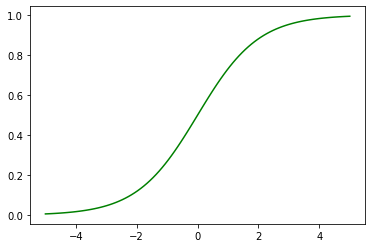

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
def sigmoid(x): 
    return 1/(1 + np.exp(-x)) 
x = np.linspace(-5,5,100) 
y = sigmoid(x) 
plt.plot(x,y,color = 'green')

逻辑回归就是在多元线性回归基础上把结果缩放到 0 ~ 1 之间。 越接近 1 越是正例， 越接近 0 越是负例，根据中间 0.5 将
数据分为二类。其中 就是概率函数~

得到了逻辑回归的表达式，下一步跟线性回归类似，构建似然函数，然后最大似然估计，最终推导出 的迭代更新表达式。只不
过这里用的不是梯度下降，而是梯度上升，因为这里是最大化似然函数。通常我们一提到损失函数，往往是求最小，这样我们就可以用梯度
下降来求解。最终损失函数就是上面公式加负号的形式

# 立体化呈现

In [2]:
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression 
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import scale # 数据标准化Z-score

## 加载乳腺癌数据

In [8]:
data = datasets.load_breast_cancer()
X, y = scale(data['data'][:, :2]), data['target']

## 求出两个维度对应的数据在逻辑回归算法下的最优解

In [9]:
lr = LogisticRegression() 
lr.fit(X, y)

LogisticRegression()

## 分别把两个维度所对应的参数W1和W2取出来

In [14]:
w1 = lr.coef_[0,0]
w2 = lr.coef_[0,1]
print(w1,w2)

-3.3373102846154525 -0.8771414036339871


## 已知w1和w2的情况下，传进来数据的X，返回数据的y_predict

In [15]:
def sigmoid(X, w1, w2): 
    z = w1*X[0] + w2*X[1] 
    return 1 / (1 + np.exp(-z))

## 传入一份已知数据的X，y，如果已知w1和w2的情况下，计算对应这份数据的Loss损失

In [16]:
def loss_function(X, y, w1, w2): 
    loss = 0
    # 遍历数据集中的每一条样本，并且计算每条样本的损失，加到loss身上得到整体的数据集损失
    for x_i, y_i in zip(X, y): 
        # 这是计算一条样本的y_predict，即概率 
        p = sigmoid(x_i, w1, w2) 
        loss += -1*y_i*np.log(p)-(1-y_i)*np.log(1-p) 
        return loss

## 参数w1和w2取值空间

In [17]:
w1_space = np.linspace(w1-2, w1+2, 100) 
w2_space = np.linspace(w2-2, w2+2, 100) 
loss1_ = np.array([loss_function(X, y, i, w2) for i in w1_space]) 
loss2_ = np.array([loss_function(X, y, w1, i) for i in w2_space])

## 数据可视化

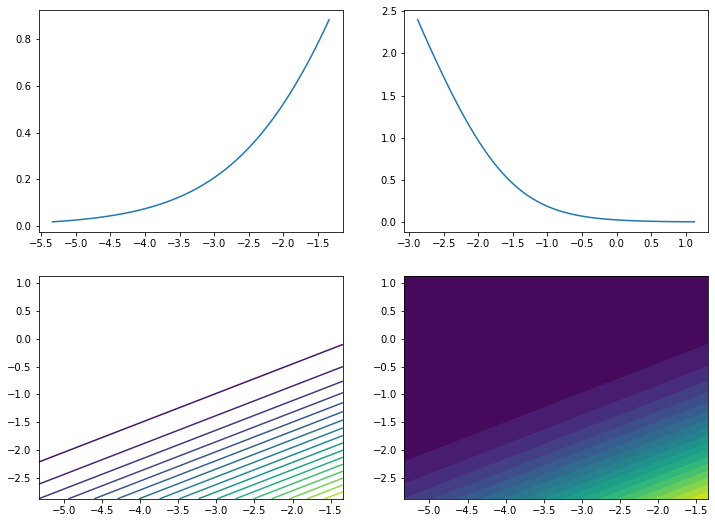

In [18]:
fig1 = plt.figure(figsize=(12, 9)) 
plt.subplot(2, 2, 1) 
plt.plot(w1_space, loss1_)

plt.subplot(2, 2, 2) 
plt.plot(w2_space, loss2_)

plt.subplot(2, 2, 3) 
w1_grid, w2_grid = np.meshgrid(w1_space, w2_space) 
loss_grid = loss_function(X, y, w1_grid, w2_grid) 
plt.contour(w1_grid, w2_grid, loss_grid,20)

plt.subplot(2, 2, 4) 
plt.contourf(w1_grid, w2_grid, loss_grid,20) 
# plt.savefig('./图片/4-损失函数可视化.png',dpi = 200)

## 3D立体可视化

/var/folders/jt/qjpzhhld5znczz2yp8zyt7xw0000gn/T/ipykernel_43483/3806792980.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig2)


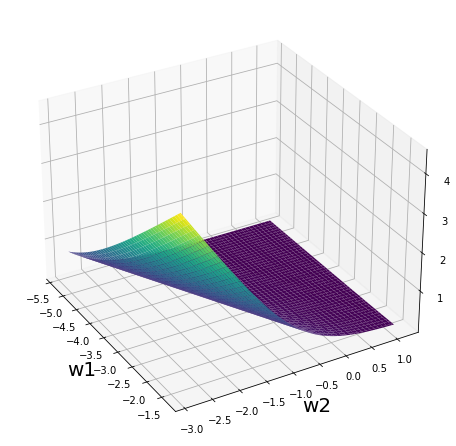

In [20]:
fig2 = plt.figure(figsize=(12,6)) 
ax = Axes3D(fig2) 
ax.plot_surface(w1_grid, w2_grid, loss_grid,cmap = 'viridis') 
plt.xlabel('w1',fontsize = 20) 
plt.ylabel('w2',fontsize = 20) 
ax.view_init(30,-30) 
# plt.savefig('./图片/5-损失函数可视化.png',dpi = 200)

# 逻辑回归迭代公式

函数特性

逻辑回归参数更新规则和，线性回归一模一样！

In [21]:
import numpy as np 
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

## 数据加载

In [22]:
iris = datasets.load_iris()

## 数据提取与筛选

In [23]:
X = iris['data'] 
y = iris['target'] 
cond = y != 2 
X = X[cond] 
y = y[cond]

## 数据拆分

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

## 模型训练

In [25]:
lr = LogisticRegression() 
lr.fit(X_train, y_train)

LogisticRegression()

## 模型预测

In [28]:
y_predict = lr.predict(X_test) 
print('测试数据保留类别是：   ',y_test) 
print('测试数据算法预测类别是：',y_predict) 
print('测试数据算法预测概率是：\n',lr.predict_proba(X_test))

测试数据保留类别是：    [1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1]
测试数据算法预测类别是： [1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1]
测试数据算法预测概率是：
 [[0.00464573 0.99535427]
 [0.98625063 0.01374937]
 [0.152348   0.847652  ]
 [0.07969297 0.92030703]
 [0.02616964 0.97383036]
 [0.001946   0.998054  ]
 [0.0112884  0.9887116 ]
 [0.0090268  0.9909732 ]
 [0.01400291 0.98599709]
 [0.02014198 0.97985802]
 [0.95542407 0.04457593]
 [0.00317523 0.99682477]
 [0.01101092 0.98898908]
 [0.97069718 0.02930282]
 [0.94833128 0.05166872]
 [0.97430437 0.02569563]
 [0.97333871 0.02666129]
 [0.00980122 0.99019878]
 [0.00236651 0.99763349]
 [0.94620784 0.05379216]
 [0.9809562  0.0190438 ]
 [0.16906036 0.83093964]
 [0.94887475 0.05112525]
 [0.0078764  0.9921236 ]
 [0.09565654 0.90434346]]


结论：

通过数据提取与筛选，创建二分类问题

类别的划分，通过概率比较大小完成了

In [29]:
#线性回归方程
b = lr.intercept_ 
w = lr.coef_

# 逻辑回归函数 
def sigmoid(z): 
    return 1/(1 + np.exp(-z))

# y = 1 概率 
z = X_test.dot(w.T) + b 
p_1 = sigmoid(z)

# y = 0 概率 
p_0 = 1 - p_1

# 最终结果 
p = np.concatenate([p_0,p_1],axis = 1) 
p

array([[0.00464573, 0.99535427],
       [0.98625063, 0.01374937],
       [0.152348  , 0.847652  ],
       [0.07969297, 0.92030703],
       [0.02616964, 0.97383036],
       [0.001946  , 0.998054  ],
       [0.0112884 , 0.9887116 ],
       [0.0090268 , 0.9909732 ],
       [0.01400291, 0.98599709],
       [0.02014198, 0.97985802],
       [0.95542407, 0.04457593],
       [0.00317523, 0.99682477],
       [0.01101092, 0.98898908],
       [0.97069718, 0.02930282],
       [0.94833128, 0.05166872],
       [0.97430437, 0.02569563],
       [0.97333871, 0.02666129],
       [0.00980122, 0.99019878],
       [0.00236651, 0.99763349],
       [0.94620784, 0.05379216],
       [0.9809562 , 0.0190438 ],
       [0.16906036, 0.83093964],
       [0.94887475, 0.05112525],
       [0.0078764 , 0.9921236 ],
       [0.09565654, 0.90434346]])

结论：

1.线性方程，对应方程

2.sigmoid函数，将线性方程转变为概率

3.自己求解概率和直接使用LogisticRegression结果一样，可知计算流程正确

# 逻辑回归做多分类

## One-Vs-Rest思想

One-Vs-Rest（ovr）的思想是把一个多分类的问题变成多个二分类的问题。转变的思路就如同方法名称描述的那样，选择其中一个类别
为正类（Positive），使其他所有类别为负类（Negative）。

对于一个三分类问题，我们最终得到 3 个二元分类器。在预测阶段，每个分类器可以根据测试样本，得到当前类别的概率。即 P(y = i |
x; θ)，i = 1, 2, 3。选择计算结果最高的分类器，其所对应类别就可以作为预测结果。
One-Vs-Rest 作为一种常用的二分类拓展方法，其优缺点也十分明显：
优点：普适性还比较广，可以应用于能输出值或者概率的分类器，同时效率相对较好，有多少个类别就训练多少个分类器。
缺点：很容易造成训练集样本数量的不平衡（Unbalance），尤其在类别较多的情况下，经常容易出现正类样本的数量远远不及负类样
本的数量，这样就会造成分类器的偏向性。

In [30]:
import numpy as np 
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

### 数据加载

In [36]:
iris = datasets.load_iris()

### 数据提取

In [37]:
X = iris['data'] 
y = iris['target']

### 数据拆分

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

### 模型训练

In [39]:
lr = LogisticRegression(multi_class = 'ovr') # 注意这里的"ovr"，这个是one-vs-rest思想的实现
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

### 模型预测

In [45]:
np.set_printoptions(suppress=True)
y_predict = lr.predict(X_test) 
print('测试数据保留类别是：',y_test) 
print('测试数据算法预测类别是：',y_predict) 
print('测试数据算法预测概率是：\n',lr.predict_proba(X_test).round(6))

测试数据保留类别是： [2 0 0 0 0 1 0 2 1 1 2 2 1 2 2 0 0 2 2 2 2 2 1 0 1 2 1 2 0 0 0 2 1 0 2 1 1
 0]
测试数据算法预测类别是： [2 0 0 0 0 1 0 2 1 1 2 2 1 2 2 0 0 2 2 2 1 2 1 0 2 2 1 2 0 0 0 2 1 0 2 1 1
 0]
测试数据算法预测概率是：
 [[0.000013 0.354091 0.645896]
 [0.843148 0.156851 0.000001]
 [0.80476  0.195238 0.000002]
 [0.956787 0.043212 0.000002]
 [0.979182 0.020815 0.000002]
 [0.05428  0.92435  0.021371]
 [0.920881 0.07911  0.000009]
 [0.003754 0.430614 0.565632]
 [0.196545 0.799406 0.00405 ]
 [0.055996 0.905491 0.038513]
 [0.002563 0.472083 0.525354]
 [0.000551 0.190631 0.808818]
 [0.037572 0.9151   0.047328]
 [0.000004 0.413878 0.586119]
 [0.000022 0.173229 0.826748]
 [0.925397 0.074599 0.000004]
 [0.925386 0.074614 0.000001]
 [0.000456 0.328011 0.671533]
 [0.000086 0.304611 0.695303]
 [0.000047 0.177    0.822953]
 [0.008726 0.674802 0.316473]
 [0.002598 0.406629 0.590773]
 [0.007708 0.764352 0.227941]
 [0.833967 0.166031 0.000002]
 [0.001602 0.422889 0.575509]
 [0.000096 0.432692 0.567211]
 [0.006572 0.686883 0.30

结论：

通过数据提取，创建三分类问题

类别的划分，通过概率比较大小完成了

In [44]:
#线性回归方程，3个方程
b = lr.intercept_ 
w = lr.coef_

# 逻辑回归函数 
def sigmoid(z): 
    return 1/(1 + np.exp(-z))

#计算三个方程的概率
z = X_test.dot(w.T) + b 
p = sigmoid(z)

# 标准化处理，概率求和为1 
p = p/p.sum(axis = 1).reshape(-1,1) 
p

array([[0.00001319, 0.3540907 , 0.64589612],
       [0.84314794, 0.15685074, 0.00000131],
       [0.80475979, 0.19523789, 0.00000233],
       [0.95678672, 0.04321163, 0.00000166],
       [0.9791822 , 0.02081544, 0.00000236],
       [0.05427968, 0.92434977, 0.02137055],
       [0.92088108, 0.0791098 , 0.00000912],
       [0.00375371, 0.43061421, 0.56563208],
       [0.19654457, 0.79940587, 0.00404956],
       [0.05599562, 0.90549122, 0.03851316],
       [0.00256319, 0.4720828 , 0.52535401],
       [0.00055092, 0.19063118, 0.8088179 ],
       [0.0375724 , 0.91510001, 0.04732759],
       [0.00000359, 0.41387782, 0.58611859],
       [0.0000222 , 0.17322933, 0.82674848],
       [0.92539697, 0.07459876, 0.00000427],
       [0.92538556, 0.07461393, 0.00000051],
       [0.00045619, 0.32801087, 0.67153293],
       [0.00008572, 0.30461149, 0.6953028 ],
       [0.0000467 , 0.17699993, 0.82295337],
       [0.00872594, 0.67480152, 0.31647254],
       [0.00259813, 0.40662882, 0.59077305],
       [0.

结论：

1.线性方程，对应方程 ，此时对应三个方程

2.sigmoid函数，将线性方程转变为概率，并进行标准化处理

3.自己求解概率和直接使用LogisticRegression结果一样

## 多分类Softmax回归

Softmax 回归是另一种做多分类的算法。从名字中大家是不是可以联想到广义线性回归，Softmax 回归是假设多项分布的，多项分布可
以理解为二项分布的扩展。投硬币是二项分布，掷骰子是多项分布。

In [46]:
import numpy as np 
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

### 数据加载

In [47]:
iris = datasets.load_iris()

### 数据提取

In [48]:
X = iris['data'] 
y = iris['target']

### 数据拆分

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

### 模型训练，使用multinomial分类器，表示多分类

In [50]:
lr = LogisticRegression(multi_class = 'multinomial',max_iter=5000) 
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

### 模型预测

In [51]:
y_predict = lr.predict(X_test) 
print('测试数据保留类别是：',y_test) 
print('测试数据算法预测类别是：',y_predict) 
print('测试数据算法预测概率是：\n',lr.predict_proba(X_test))

测试数据保留类别是： [2 2 1 0 1 2 0 2 2 0 0 2 0 1 2 0 0 1 1 2 2 1 2 2 2 1 0 0 1 0 2 2 0 0 1 1 0
 1]
测试数据算法预测类别是： [2 2 1 0 1 2 0 2 2 0 0 1 0 1 2 0 0 1 1 2 2 2 2 2 2 1 0 0 2 0 2 2 0 0 1 1 0
 1]
测试数据算法预测概率是：
 [[0.00042806 0.31860221 0.68096973]
 [0.00014606 0.05677952 0.94307442]
 [0.02104734 0.94694599 0.03200667]
 [0.97709392 0.02290601 0.00000007]
 [0.00455942 0.74263497 0.25280561]
 [0.00000019 0.00273263 0.99726717]
 [0.98016321 0.01983673 0.00000006]
 [0.00001011 0.04763683 0.95235307]
 [0.00001904 0.03566643 0.96431454]
 [0.97818578 0.02181408 0.00000014]
 [0.97067287 0.029327   0.00000013]
 [0.00067575 0.53937272 0.45995153]
 [0.98550113 0.01449882 0.00000005]
 [0.02323046 0.90117268 0.07559686]
 [0.00000138 0.01239281 0.98760581]
 [0.96767625 0.03232362 0.00000013]
 [0.96285582 0.03714383 0.00000036]
 [0.00558462 0.63219708 0.3622183 ]
 [0.02493752 0.91944814 0.05561434]
 [0.00002484 0.04557439 0.95440076]
 [0.00045001 0.18332432 0.81622567]
 [0.00076702 0.35866327 0.64056971]
 [0.00000146

结论：

1.通过数据提取，创建三分类问题

2.参数multi_class设置成multinomial表示多分类，使用交叉熵作为损失函数

3.类别的划分，通过概率比较大小完成了

In [52]:
# 线性回归方程，3个方程
b = lr.intercept_ 
w = lr.coef_

# softmax函数 
def softmax(z): 
    return np.exp(z)/np.exp(z).sum(axis = 1).reshape(-1,1)

# 计算三个方程的概率 
z = X_test.dot(w.T) + b 
p = softmax(z) 
p

array([[0.00042806, 0.31860221, 0.68096973],
       [0.00014606, 0.05677952, 0.94307442],
       [0.02104734, 0.94694599, 0.03200667],
       [0.97709392, 0.02290601, 0.00000007],
       [0.00455942, 0.74263497, 0.25280561],
       [0.00000019, 0.00273263, 0.99726717],
       [0.98016321, 0.01983673, 0.00000006],
       [0.00001011, 0.04763683, 0.95235307],
       [0.00001904, 0.03566643, 0.96431454],
       [0.97818578, 0.02181408, 0.00000014],
       [0.97067287, 0.029327  , 0.00000013],
       [0.00067575, 0.53937272, 0.45995153],
       [0.98550113, 0.01449882, 0.00000005],
       [0.02323046, 0.90117268, 0.07559686],
       [0.00000138, 0.01239281, 0.98760581],
       [0.96767625, 0.03232362, 0.00000013],
       [0.96285582, 0.03714383, 0.00000036],
       [0.00558462, 0.63219708, 0.3622183 ],
       [0.02493752, 0.91944814, 0.05561434],
       [0.00002484, 0.04557439, 0.95440076],
       [0.00045001, 0.18332432, 0.81622567],
       [0.00076702, 0.35866327, 0.64056971],
       [0.

结论：

1.线性方程，对应方程 ，多分类，此时对应三个方程

2.softmax函数，将线性方程转变为概率

3.自己求解概率和直接使用LogisticRegression结果一样

# 逻辑回归与Softmax回归对比

逻辑回归是Softmax回归特例证明

逻辑回归可以看成是 Softmax 回归的特例，当k = 2 时，softmax 回归退化为逻辑回归

# 葡萄酒预测作业

## 加载数据

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = datasets.load_wine(return_X_y=True)
display(X.shape,np.unique(y)) # 查看数据

(178, 13)

array([0, 1, 2])

## 数据处理（删除类别0）

In [2]:
cond = y != 0
X = X[cond]
y = y[cond]
display(X.shape,y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(119, 13)

(119,)

(95, 13)

(24, 13)

(95,)

(24,)

## 建模

In [3]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
proba_ = model.predict_proba(X_test)
np.set_printoptions(suppress=True)
display(proba_[:10])

array([[0.25250565, 0.74749435],
       [0.3500487 , 0.6499513 ],
       [0.99966088, 0.00033912],
       [0.99792078, 0.00207922],
       [0.96812805, 0.03187195],
       [0.99064776, 0.00935224],
       [0.00022347, 0.99977653],
       [0.84801229, 0.15198771],
       [0.18997292, 0.81002708],
       [0.00004141, 0.99995859]])

## 手动计算概率

In [4]:
w_ = model.coef_
b_ = model.intercept_

display(w_,b_)

array([[ 0.26105324,  0.41557197,  0.1652562 ,  0.10457278,  0.03779976,
        -0.54011906, -1.26941355, -0.09792213, -0.61229003,  1.45882921,
        -0.38366167, -0.92263754,  0.00452835]])

array([-14.38729507])

In [5]:
z = X_test.dot(w_.reshape(-1)) + b_

def sigmoid(z):
    return 1/(1 + np.exp(-z))

p = sigmoid(z)

p = np.column_stack([1-p,p])

# 和上面proba_对比，可知一致
p[:10]

array([[0.25250565, 0.74749435],
       [0.3500487 , 0.6499513 ],
       [0.99966088, 0.00033912],
       [0.99792078, 0.00207922],
       [0.96812805, 0.03187195],
       [0.99064776, 0.00935224],
       [0.00022347, 0.99977653],
       [0.84801229, 0.15198771],
       [0.18997292, 0.81002708],
       [0.00004141, 0.99995859]])

结论：自己手算和代码计算概率的结果一致！！！

# 手写数字多分类作业

## 加载数据

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# 42000个样本
# 第一列是目标值，y
# 第二列一直到最后是特征，相当于X，这些特征都是像素
# 手写数字图片，是由像素组成的，因此像素作为特征，决定着，这张图片是数字几
data = pd.read_csv('./digits.csv')
display(data.shape,data.head())

(42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 42000个样本有点多，取出其中5000个即可
index = np.random.randint(0,42000,size = 5000)
data = data.take(index)
display(data.shape,data.head())

(5000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21039,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38972,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25738,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40775,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 数据抽取与拆分

In [4]:
X = data.iloc[:,1:]
y = data['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1024)

display(X_train.shape,y_train.shape)
display(X_test.shape,y_test.shape)
display(X_train.head())

(4500, 784)

(4500,)

(500, 784)

(500,)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_test.head()

8230     6
21200    1
10004    3
15092    3
6079     0
Name: label, dtype: int64

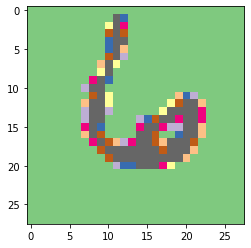

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_test.iloc[0].values.reshape(28,28),cmap = 'Accent')

In [8]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

## 模型训练与预测

In [10]:
%%time
model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
proba_ = model.predict_proba(X_test)
display('预测值类别是：',y_pred[:20])
display('预测值概率是：', proba_[:20])

'预测值类别是：'

array([6, 1, 3, 3, 0, 4, 0, 9, 4, 0, 2, 3, 0, 8, 1, 3, 6, 7, 0, 0])

'预测值概率是：'

array([[2.90304157e-42, 2.29374058e-58, 5.23623860e-20, 1.46792334e-56,
        2.49752508e-15, 6.35987886e-40, 1.00000000e+00, 7.32584491e-35,
        1.20405352e-36, 1.18052728e-32],
       [7.23899350e-25, 1.00000000e+00, 6.73802615e-12, 2.64368250e-11,
        2.61132718e-23, 1.06589145e-16, 5.91692603e-21, 2.27017870e-18,
        4.54782771e-12, 1.46758442e-20],
       [5.92663745e-32, 1.43157957e-27, 4.24942105e-04, 9.99575027e-01,
        1.56585899e-51, 4.08170065e-21, 3.04916554e-08, 2.19614403e-20,
        3.02028448e-14, 5.49606457e-26],
       [1.22022936e-20, 3.52438993e-18, 1.89619141e-16, 9.99999266e-01,
        1.07918046e-11, 6.42047107e-07, 5.38923682e-20, 8.34902083e-29,
        9.23533716e-08, 3.19712513e-25],
       [1.00000000e+00, 3.17384101e-65, 2.78567291e-19, 1.82299183e-20,
        8.57435203e-60, 1.66618928e-15, 2.47818823e-32, 2.25094356e-70,
        3.74558584e-21, 6.99211736e-60],
       [3.08538929e-21, 5.51815700e-23, 5.49185732e-16, 1.18345881e-15,
   

CPU times: user 1min 39s, sys: 21.4 s, total: 2min 1s
Wall time: 18.6 s


In [11]:
model.score(X_test,y_test)

0.89

## 手动计算概率

In [12]:
w_ = model.coef_
b_ = model.intercept_
display(w_,w_.shape)
display(b_)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(10, 784)

array([ -0.47116633,   1.82932508,   0.70312888,  -1.44718654,
         1.59367031,  11.55574812,  -0.10716723,   2.43526481,
       -13.9588814 ,  -2.13273571])

In [13]:
z = X_test.dot(w_.T) + b_

def softmax(z):
    return np.exp(z)/np.exp(z).sum(axis=1).values.reshape(-1,1)
softmax(z)[:10]

,0,1,2,3,4,5,6,7,8,9
8230,2.903042e-42,2.293741e-58,5.236239e-20,1.467923e-56,2.497525e-15,6.359879e-40,1.000000e+00,7.325845e-35,1.204054e-36,1.180527e-32
21200,7.238993e-25,1.000000e+00,6.738026e-12,2.643682e-11,2.611327e-23,1.065891e-16,5.916926e-21,2.270179e-18,4.547828e-12,1.467584e-20
10004,5.926637e-32,1.431580e-27,4.249421e-04,9.995750e-01,1.565859e-51,4.081701e-21,3.049166e-08,2.196144e-20,3.020284e-14,5.496065e-26
15092,1.220229e-20,3.524390e-18,1.896191e-16,9.999993e-01,1.079180e-11,6.420471e-07,5.389237e-20,8.349021e-29,9.235337e-08,3.197125e-25
6079,1.000000e+00,3.173841e-65,2.785673e-19,1.822992e-20,8.574352e-60,1.666189e-15,2.478188e-32,2.250944e-70,3.745586e-21,6.992117e-60
28719,3.085389e-21,5.518157e-23,5.491857e-16,1.183459e-15,1.000000e+00,2.206994e-08,1.556638e-11,2.386630e-13,2.791301e-20,5.122034e-12
31836,9.999937e-01,1.793823e-52,2.899755e-07,7.727021e-23,4.122562e-36,9.818263e-20,6.059399e-06,1.839322e-33,1.637716e-16,3.103725e-19
12937,7.175358e-39,3.062265e-37,2.128762e-33,2.100551e-03,1.499061e-14,4.079457e-12,1.288305e-29,1.541849e-03,1.366112e-14,9.963576e-01
35320,4.066836e-48,4.148173e-41,2.546197e-31,2.546807e-40,1.000000e+00,7.817738e-38,2.337323e-27,2.694651e-19,1.115380e-22,2.134991e-10
32385,1.000000e+00,1.836797e-64,1.819728e-34,7.872034e-40,2.705622e-82,1.662788e-19,4.569012e-51,4.603703e-78,3.435547e-39,3.830004e-75
